# Benchmark de Modelos de Classificação — Dataset Wine

Este notebook faz parte de um projeto de benchmarking de algoritmos clássicos de aprendizado de máquina supervisionado. O objetivo é comparar o desempenho de diferentes modelos em tarefas de classificação e regressão, utilizando datasets bem conhecidos da literatura.

Neste experimento, utilizamos o **dataset Wine**, que contém informações químicas de 178 amostras de vinho, classificadas em três categorias distintas. Cada amostra possui 13 atributos contínuos, como teor alcoólico, acidez, magnésio, fenóis e outros componentes químicos.

A proposta é:

- Avaliar o desempenho de algoritmos clássicos de classificação (Logistic Regression, Decision Tree, Random Forest, SVM, KNN, Naive Bayes e MLP)
- Utilizar tanto a abordagem de validação hold-out quanto validação cruzada (k-fold)
- Comparar acurácia média e estabilidade (desvio padrão) entre os modelos
- Refletir sobre os resultados obtidos e a capacidade de generalização dos algoritmos

Este estudo complementa o benchmark anterior com o dataset Iris, permitindo observar como os modelos se comportam em um cenário mais complexo e com maior dimensionalidade.



# 🔹 1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# 🔹 2. Carregamento do dataset

In [2]:
data = load_wine(as_frame=True)
df = data.frame
df['target'] = data.target

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# 🔹 3. Pré-processamento

In [3]:
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 🔹 4. Definição dos modelos

In [4]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(max_iter=1000)
}


# 🔹 5. Treinamento e avaliação (hold-out)

In [5]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Decision Tree
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36


Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

   

# 🔹 6. Validação cruzada

In [6]:
cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    cv_results[name] = (scores.mean(), scores.std())
    print(f"{name}: Média = {scores.mean():.3f}, Desvio = {scores.std():.3f}")


Logistic Regression: Média = 0.989, Desvio = 0.014
Decision Tree: Média = 0.871, Desvio = 0.049
Random Forest: Média = 0.972, Desvio = 0.025
SVM: Média = 0.983, Desvio = 0.022
KNN: Média = 0.955, Desvio = 0.029
Naive Bayes: Média = 0.966, Desvio = 0.021
MLP: Média = 0.983, Desvio = 0.022


# 🔹 7. Visualização dos resultados

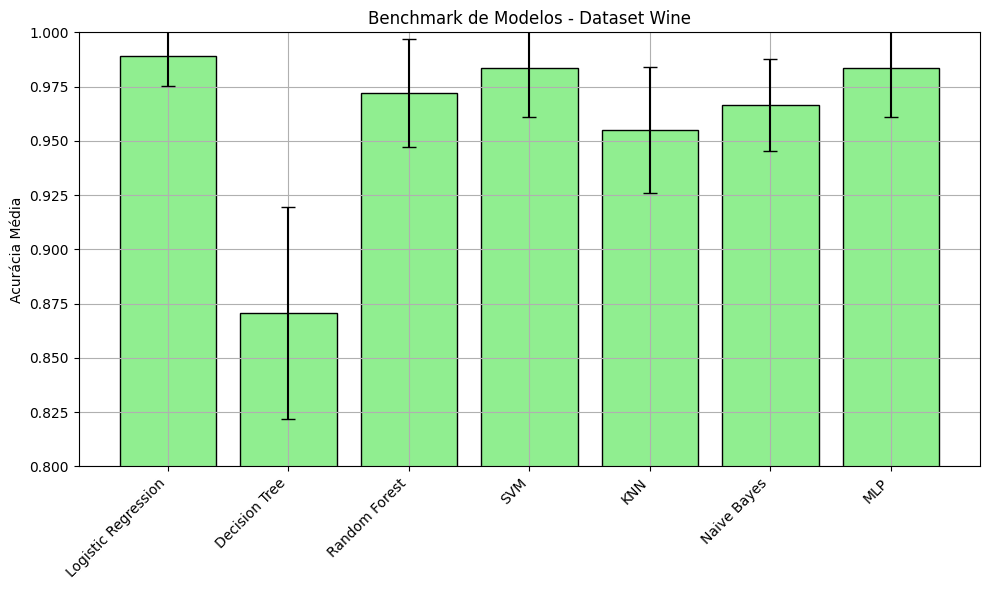

In [7]:
modelos = list(cv_results.keys())
medias = [cv_results[m][0] for m in modelos]
desvios = [cv_results[m][1] for m in modelos]

plt.figure(figsize=(10, 6))
plt.bar(modelos, medias, yerr=desvios, capsize=5, color='lightgreen', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Acurácia Média')
plt.title('Benchmark de Modelos - Dataset Wine')
plt.ylim(0.80, 1.00)
plt.grid(True)
plt.tight_layout()
plt.show()


## 📌 Reflexão: Acurácia no hold-out vs. validação cruzada — Dataset Wine

Neste estudo com o dataset Wine, observamos que **quase todos os modelos atingiram acurácia perfeita (1.0) no conjunto de teste hold-out**, com exceção do KNN, que obteve 94.4%. Isso já indica que o problema é bem resolvido por algoritmos supervisionados — mas a validação cruzada revela nuances importantes:

- **KNN teve desempenho inferior no hold-out**, especialmente na classe 1, com recall de apenas 0.86. Isso mostra que o modelo teve dificuldade em generalizar para essa classe específica.
- **Decision Tree teve a menor média na validação cruzada (0.871)** e o maior desvio (0.049), sugerindo instabilidade e possível overfitting.
- **Logistic Regression, SVM e MLP lideraram em média de acurácia**, todos acima de 0.98, com baixa variabilidade — indicando modelos robustos e consistentes.
- **Random Forest e Naive Bayes também performaram bem**, com médias acima de 0.96 e desvios baixos, reforçando sua confiabilidade.

**Conclusão**: O dataset Wine é mais complexo que o Iris, com 13 variáveis contínuas e três classes. A validação cruzada mostra que, embora o hold-out sugira acurácia perfeita, há variações importantes entre os modelos. Isso reforça a importância de avaliar desempenho em múltiplos folds para evitar conclusões precipitadas.

